# Zomato Data Analysis

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [120]:
df=pd.read_csv("Zomato-data-.csv")

In [121]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [122]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [123]:
#df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
df['approx_cost(for two people)']= df['approx_cost(for two people)']/2
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].round().astype('int64')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,400,Buffet
1,Spice Elephant,Yes,No,4.1,787,400,Buffet
2,San Churro Cafe,Yes,No,3.8,918,400,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,150,Buffet
4,Grand Village,No,No,3.8,166,300,Buffet


In [124]:
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

In [125]:
df.rename(columns={'approx_cost(for two people)': 'approx_cost(for one person)'}, inplace=True)

In [126]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for one person),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,400,Buffet
1,Spice Elephant,Yes,No,4.1,787,400,Buffet
2,San Churro Cafe,Yes,No,3.8,918,400,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,150,Buffet
4,Grand Village,No,No,3.8,166,300,Buffet


In [127]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [128]:
df['price_category'] = pd.cut(df['approx_cost(for one person)'], 
                             bins=[0, 200, 400, 800], 
                             labels=['Budget', 'Mid', 'Premium'])

In [129]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for one person),listed_in(type),price_category
0,Jalsa,Yes,Yes,4.1,775,400,Buffet,Mid
1,Spice Elephant,Yes,No,4.1,787,400,Buffet,Mid
2,San Churro Cafe,Yes,No,3.8,918,400,Buffet,Mid
3,Addhuri Udupi Bhojana,No,No,3.7,88,150,Buffet,Budget
4,Grand Village,No,No,3.8,166,300,Buffet,Mid


In [130]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for one person)    0
listed_in(type)                0
price_category                 0
dtype: int64

In [131]:
df1=df.groupby('listed_in(type)')['rate'].mean().reset_index()
df1

,listed_in(type),rate
0,Buffet,3.842857
1,Cafes,3.765217
2,Dining,3.571818
3,other,3.912500


In [132]:
df2=df.groupby('online_order')['rate'].mean().reset_index()
df2

,online_order,rate
0,No,3.487778
1,Yes,3.858621


In [133]:
df3=df.groupby('book_table')['approx_cost(for one person)'].median().reset_index()
df3

,book_table,approx_cost(for one person)
0,No,187.5
1,Yes,350.0


In [134]:
df4=df.groupby('listed_in(type)')['approx_cost(for one person)'].median().astype('int64').reset_index()
df4

,listed_in(type),approx_cost(for one person)
0,Buffet,400
1,Cafes,275
2,Dining,150
3,other,350


In [135]:
df5 = df.groupby('price_category', observed=False)['rate'].mean().reset_index()
df5

,price_category,rate
0,Budget,3.52
1,Mid,3.80
2,Premium,3.62


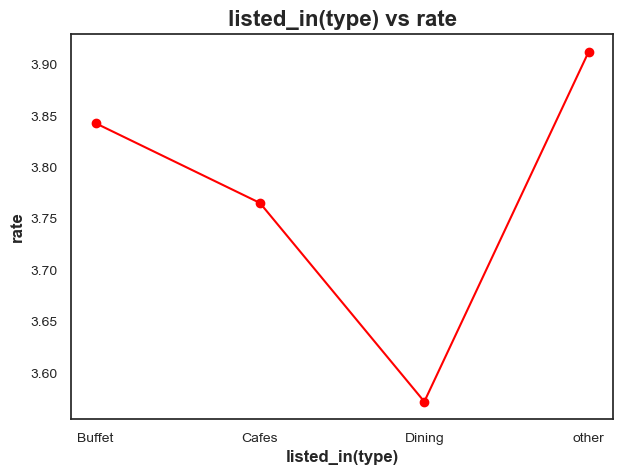

In [136]:
sns.set_style('white')
plt.figure(figsize=(7,5))
plt.plot(df1['listed_in(type)'], df1['rate'], marker= 'o', color='red')
plt.title('listed_in(type) vs rate', fontsize=16, fontweight='bold')
plt.xlabel('listed_in(type)', fontsize= 12, fontweight='bold')
plt.ylabel('rate', fontsize=12, fontweight= 'bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

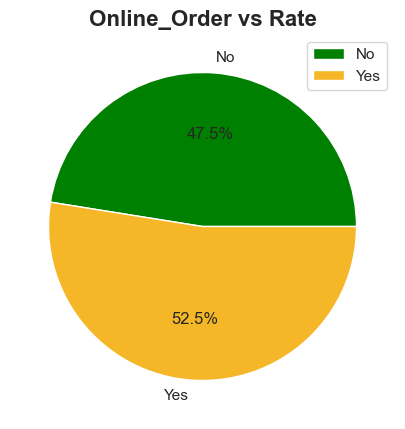

In [137]:
plt.figure(figsize=(7,5))
plt.pie(df2['rate'],labels=df2['online_order'], autopct='%1.1f%%', colors=['green','#F5B727'])
plt.title('Online_Order vs Rate', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

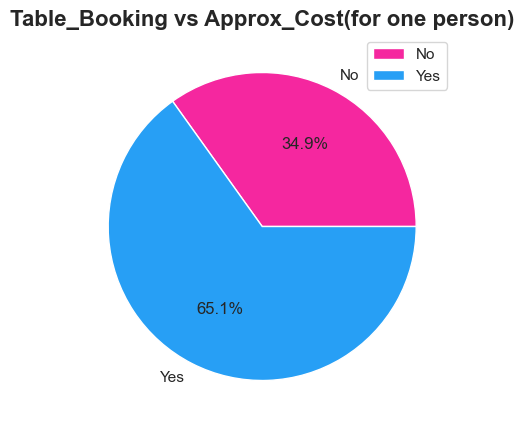

In [138]:
plt.figure(figsize=(7,5))
plt.pie(df3['approx_cost(for one person)'],labels=df3['book_table'], autopct='%1.1f%%', colors=['#F5279F','#279FF5'])
plt.title('Table_Booking vs Approx_Cost(for one person)', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

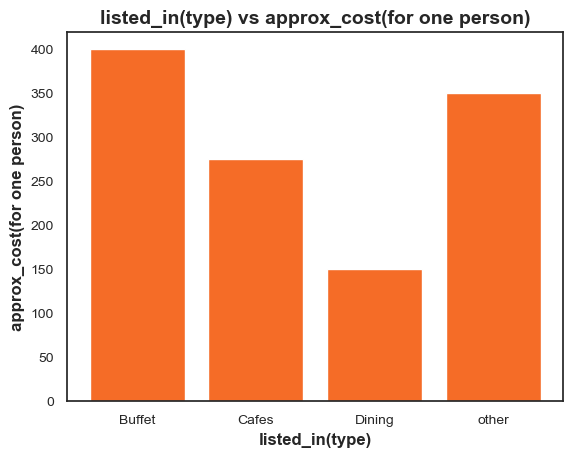

In [139]:
sns.set_style('white')
plt.bar(df4['listed_in(type)'], df4['approx_cost(for one person)'], color='#F56C27')
plt.title('listed_in(type) vs approx_cost(for one person)', fontsize=14, fontweight='bold')
plt.xlabel('listed_in(type)', fontsize=12, fontweight='bold')
plt.ylabel('approx_cost(for one person)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

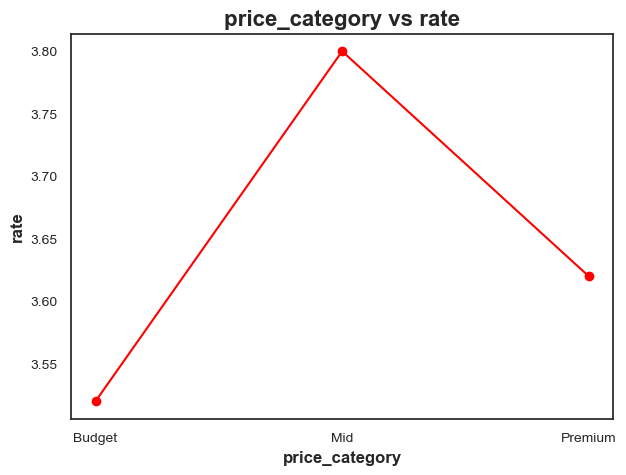

In [141]:
sns.set_style('white')
plt.figure(figsize=(7,5))
plt.plot(df5['price_category'], df5['rate'], marker= 'o', color='red')
plt.title('price_category vs rate', fontsize=16, fontweight='bold')
plt.xlabel('price_category', fontsize= 12, fontweight='bold')
plt.ylabel('rate', fontsize=12, fontweight= 'bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Observations
### Restaurants other than dinners, buffets, and cafes tend to receive higher ratings.
### Online orders are associated with higher ratings compared to dine-in.
### The per person cost is generally higher when customers book a table in advance.
### Buffet restaurants typically have a higher cost per person compared to other types.
### Restaurants in the mid-price category tend to achieve better ratings than budget or premium-priced ones.

# Conclusions
### Non-buffet and non-café restaurants deliver higher customer satisfaction.
### Online ordering enhances the overall dining experience, reflected in better ratings.
### Table reservations are linked with premium dining, leading to higher per-person costs.
### Buffets are positioned as a costlier dining option compared to other formats.

# Amisha Jain
### B.Tech Computer Science and Engineering
### PES University, Bengaluru
### Email: jainamisha2004@gmail.com